In [6]:
import numpy as np
from scipy import stats

data = np.array([4,5,6,7,8,3,2,2,2,1,1])

a = np.mean(data)
b = np.median(data)
c = stats.mode(data)

print(c[0][0]) # 최빈값

2


In [10]:
from statistics import variance, stdev

a = variance(data) # 분산
b = stdev(data) # 표준편차

print(b)

2.449489742783178


In [15]:
# 백분위수 ex) 20%에 해당하는 값, 80%에 해당하는값
for val in [20,80,100]:
    d = np.percentile(data,val)
    print(str(val)+"% = ",d)


20% =  2.0
80% =  6.0
100% =  8.0


In [16]:
# 사분위수, IQR
a,b,c = np.percentile(data, [25,50,75])
print(a)
print(b)
print(c)
print(c-a)

2.0
3.0
5.5
3.5


In [17]:
#카이제곱 검정    이산형(범주), 이산형(범주)을 비교
import pandas as pd
from scipy import stats
from numpy import mean

#data1과 data2 사이에 유의한 관계가 있는가?
#귀무가설 : data1과 data2는 차이가 없다.
#대립가설 : data1과 data2는 차이가 있다.

data1 = [4,6,17,16,8,9]
data2 = [10,10,10,10,10,10]

# 검정통계량과 p-value
chis = stats.chisquare(data1, data2)
chis

# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의한 관계가 있다.
# 귀무가설 기각, 대립가설 채택
# 따라서 data1과 data2는 차이가 있다.

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [31]:
# 단일표본 T 검정
#귀무가설 : 학생들의 평균키는 175cm이다.
#대립가설 : 학생들의 평균키는 175cm가 아니다.

import numpy as np
from scipy import stats

np.random.seed(1) #랜덤값 고정

# np.random.normal(평균,표준편차) 20번 for문을 돌린다.
heights = [180 + np.random.normal(0,5) for a in range(20)]
print(mean(heights))

result = stats.ttest_1samp(heights, 175)
print("검정통계량: %.3f, pvalue: %.3f" % result)

#p-value : 0.05보다 작음
#귀무가설 기각, 대립가설 채택
#학생들의 평균키는 175cm가 아니다.

179.33317681769637
검정통계량: 3.435, pvalue: 0.003


In [32]:
# 독립표본 t검정 (서로다른 2개의 그룹)
import numpy as np
from scipy import stats
np.random.seed(1) #랜덤 시드 고정(같은 결과가 나옴)

In [37]:
# 귀무가설 : 평균이 같다.
# 대립가설 : 평균이 같지 않다.
# np.random.normal(평균,표준편차)
# 표준편차 : 평균에서 흩어져 있는 정도
# range(20) : 0~19

group1=[170+np.random.normal(0,5) for a in range(20)]
group2=[175+np.random.normal(0,10) for a in range(20)]
#print(group1)
#print(group2)

# group1과 group2의 값을 독립표본t검정
# 등분산을 가정한경우(분산이 같은경우) f통계로 구분해야한다.
result1 = stats.ttest_ind(group1,group2)

# 등분산을 가정하지 않은경우(분산이 다른경우) f통계로 구분
result2 = stats.ttest_ind(group1,group2, equal_var=False)

#검정통계량과 pvalue가 출력됨
print(result1)

# p-value < 0.05 : 95% 신뢰수준하에서 유의 
# p-value < 0.01 : 99% 신뢰수준하에서 유의
#0.015277552693410041
#결론 : 귀무가설 기각, 대립가설 채택
# 두 집단의 평균키가 다르다.

Ttest_indResult(statistic=-3.5328383364051623, pvalue=0.001097933069583495)


In [41]:
# 대응표본 t검정 (같은 그룹) before, after

#귀무가설 : 다이어트약 복용 전후의 체중 변화가 없다.
#대립가설 : 다이어트약 복용 전후의 체중 변화가 있다.

import numpy as np
from scipy import stats
np.random.seed(1)

In [46]:
before = [60 + np.random.normal(0,5) for a in range(20)]
after = [w * np.random.normal(0.99, 0.02) for w in before]
#print(before)
#print(after)

result = stats.ttest_rel(before, after)
print(result)

#pvalue=0.11079038014211379
#pvalue가 0.05보다 크므로 귀무가설 채택, 대립가설 기각
#결론 : 다이어트약 복용 전후의 체중변화가 없다.

Ttest_relResult(statistic=0.5297205147248806, pvalue=0.6024413493374686)


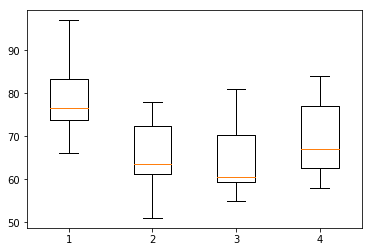

4.2210931159803815 0.013933707427484199


In [48]:
# ANOVA 분석 (그룹이 3개 이상일경우)
#귀무가설 : 4가지 교육훈련의 성과가 같다.
#대립가설 : 4가지 교육훈련의 성과가 같지 않다.

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#a=[66,74,82,75,73,97,87,78]
#b=[76,73,81,79,72,91,83,79]
#c=[69,72,81,78,72,91,89,71]
#d=[61,72,83,74,75,96,87,79]
a = [66,74,82,75,73,97,87,78]
b = [72,51,59,62,74,64,78,63]
c = [61,60,57,60,81,55,70,71]
d = [63,61,76,84,58,65,69,80]

plot_data=[a,b,c,d]
ax = plt.boxplot(plot_data) #박스플롯
plt.show()

#일원배치 분산분석(아노바분석)
F_statistic, pVal = stats.f_oneway(a,b,c,d)
print(F_statistic, pVal) # 통계량, p-value

# p-value : 0.013933707427484199
# 95% 신뢰수준하에서 유의
# 99% 신뢰수준하에서 유의하지 않음